## Prediction of Flight Ticket Price
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities in India

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#loading the train dataset
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

### Exploratory Data Analysis and Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#dropping null values
df=df.dropna()
df.shape

(10682, 11)

In [6]:
#Extracting date,month and year from Date feature
df['Day']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Day              10682 non-null  object
 12  Month            10682 non-null  object
 13  Year             10682 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.2+ MB


In [8]:
#converting Day, Month and Year to int 
df['Day']=df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Day              10682 non-null  int32 
 12  Month            10682 non-null  int32 
 13  Year             10682 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.1+ MB


In [9]:
#dropping the Date column
df=df.drop('Date_of_Journey',axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [10]:
#Cleaning out arrival time
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [11]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [12]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [13]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [14]:
#mapping Total Stops into integer form
stopmap={'1 stop':1,'non-stop':0,'2 stops':2,'3 stops': 3,'4 stops':4}

In [15]:
df['Stops']=df['Total_Stops'].map(stopmap)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,1


In [16]:
df['Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Stops, dtype: int64

In [17]:
#dropping the Total-Stops column
df=df.drop('Total_Stops',axis=1)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Day,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,3,2019,1


In [18]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [19]:
df['Route'].nunique()

128

In [20]:
#Extracting hours and minutes from duration
df['Hours']=df['Duration'].str.split(' ').str[0]
df['Minutes']=df['Duration'].str.split(' ').str[1]
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Day,Month,Year,Stops,Hours,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897,24,3,2019,0,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882,9,6,2019,2,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,3,2019,1,4h,45m


In [21]:
df['Minutes'].isna().sum()

1032

In [22]:
df['Minutes'].fillna('0m',inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Day,Month,Year,Stops,Hours,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897,24,3,2019,0,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882,9,6,2019,2,19h,0m
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,3,2019,1,4h,45m


In [23]:
df['Hours']=df['Hours'].apply(lambda x:x[:-1])
df['Minutes']=df['Minutes'].apply(lambda x:x[:-1])
df['Hours']=df['Hours'].astype(int)
df['Minutes']=df['Minutes'].astype(int)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Day,Month,Year,Stops,Hours,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897,24,3,2019,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882,9,6,2019,2,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,3,2019,1,4,45


In [24]:
df['Total Minutes']=(df['Hours']*60)+df['Minutes']
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Day,Month,Year,Stops,Hours,Minutes,Total Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897,24,3,2019,0,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882,9,6,2019,2,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,3,2019,1,4,45,285


In [25]:
#dropping the unrequired columns
df=df.drop(['Hours','Minutes','Dep_Time','Arrival_Time','Duration'],axis=1)
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Day,Month,Year,Stops,Total Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,2019,0,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,2019,2,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,2019,2,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,2019,1,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,2019,1,285


In [26]:
df['Year'].value_counts()

2019    10682
Name: Year, dtype: int64

In [27]:
#Dropping the year column
df=df.drop('Year',axis=1)
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Day,Month,Stops,Total Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,0,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,2,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,2,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,1,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,1,285


### Data Visualization

In [28]:
#importing libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import style
style.use('ggplot')
%matplotlib inline

[]

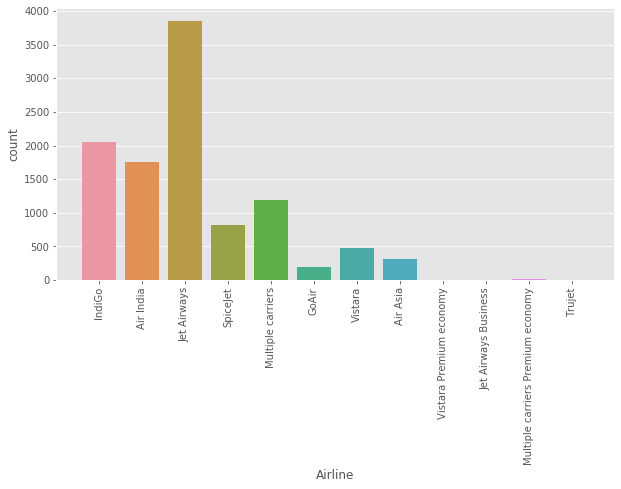

In [29]:
#Different airlines
plt.figure(figsize=(10,5))
sns.countplot(df['Airline'])
plt.xticks(rotation=90)
plt.plot()

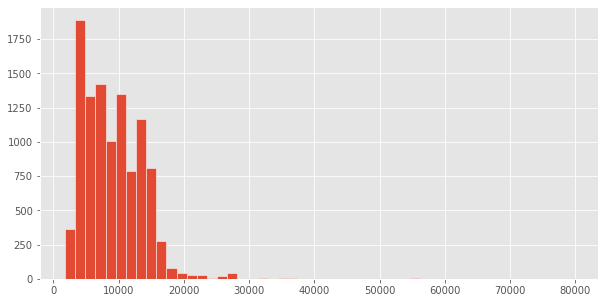

In [30]:
#distribution of flight prices
plt.figure(figsize=(10,5))
plt.hist(df['Price'],ec='white',bins=50)
plt.show()

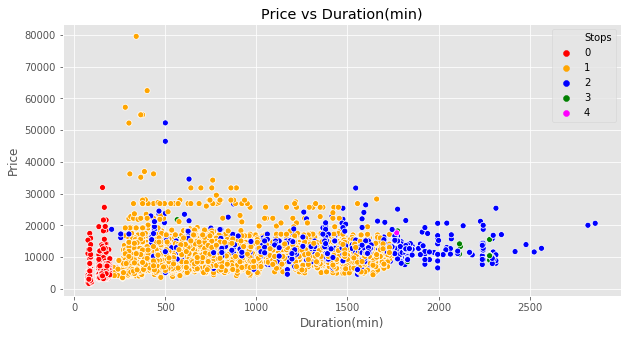

In [31]:
#scatter plot between price and flight duration
plt.figure(figsize=(10,5))
sns.scatterplot(x='Total Minutes',y='Price',hue='Stops',data=df,palette=['Red','Orange','Blue','Green','Magenta'])
plt.xlabel('Duration(min)')
plt.ylabel('Price')
plt.title('Price vs Duration(min)')
plt.show()

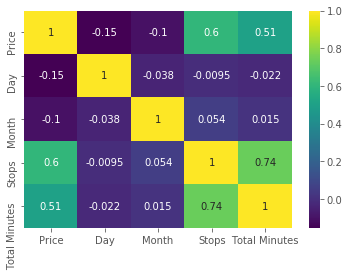

In [32]:
#plotting the correlation matrix
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

### Data Preparation of Training and Prediction 

In [33]:
#Handling categorical variables
df['Route_1']=df['Route'].str.split('→ ').str[0]
df['Route_2']=df['Route'].str.split('→ ').str[1]
df['Route_3']=df['Route'].str.split('→ ').str[2]
df['Route_4']=df['Route'].str.split('→ ').str[3]
df['Route_5']=df['Route'].str.split('→ ').str[4]
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Day,Month,Stops,Total Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,0,170,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,2,445,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,2,1140,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,1,325,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,1,285,BLR,NAG,DEL,NaN,NaN


In [34]:
#Replacing the Nan values in route
df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Day,Month,Stops,Total Minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,0,170,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,2,445,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,2,1140,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,1,325,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,1,285,BLR,NAG,DEL,None,None


In [35]:
#creating dummy variables for Airline, Source and Destination
dum=pd.get_dummies(df[['Airline','Source','Destination','Additional_Info']])
df=pd.concat([df,dum],axis=1)
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Day,Month,Stops,Total Minutes,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,0,170,...,0,0,0,0,0,0,0,0,1,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,2,445,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,2,1140,...,0,0,0,0,0,0,0,0,1,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,1,325,...,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,1,285,...,0,0,0,0,0,0,0,0,1,0


In [36]:
#applying label encoder to the route columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Route_1"]=le.fit_transform(df['Route_1'])
df["Route_2"]=le.fit_transform(df['Route_2'])
df["Route_3"]=le.fit_transform(df['Route_3'])
df["Route_4"]=le.fit_transform(df['Route_4'])
df["Route_5"]=le.fit_transform(df['Route_5'])
df.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Day,Month,Stops,Total Minutes,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,24,3,0,170,...,0,0,0,0,0,0,0,0,1,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,1,5,2,445,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,9,6,2,1140,...,0,0,0,0,0,0,0,0,1,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,12,5,1,325,...,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,1,3,1,285,...,0,0,0,0,0,0,0,0,1,0


In [37]:
#creating the feature vectors for training and testing
x=df.drop(['Airline','Source','Destination','Route','Price','Additional_Info'],axis=1).values
y=df['Price'].values
print(x.shape,y.shape)

(10682, 42) (10682,)


In [74]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.3,random_state=42)
print(xtr.shape,xts.shape,ytr.shape,yts.shape)

(7477, 42) (3205, 42) (7477,) (3205,)


### Linear Regression

In [75]:
#importing linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [76]:
#training the logistic regression model
lr.fit(xtr,ytr)
ypr_lr=lr.predict(xts)

In [77]:
#importing evalutation metrics
from sklearn.metrics import r2_score,mean_squared_error

In [78]:
#printing the evaluation metrics
print(r2_score(yts,ypr_lr))

0.7050404285119773


In [79]:
print(mean_squared_error(yts,ypr_lr))

6017448.5617956


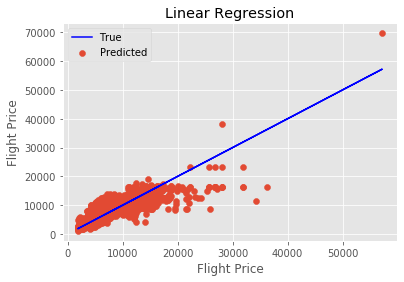

In [80]:
#plotting the true and predicted prices
plt.scatter(yts,ypr_lr,label='Predicted')
plt.plot(yts,yts,label='True',c='b')
plt.xlabel('Flight Price')
plt.ylabel('Flight Price')
plt.title('Linear Regression')
plt.legend(loc='best')
plt.show()

### Random Forest Regressor

In [81]:
#using random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [82]:
#training random forest regressor
rf.fit(xtr,ytr)
ypr_rf=rf.predict(xts)

In [83]:
print(r2_score(yts,ypr_rf))

0.8704878519748143


In [84]:
print(mean_squared_error(yts,ypr_rf))

2642167.8229921726


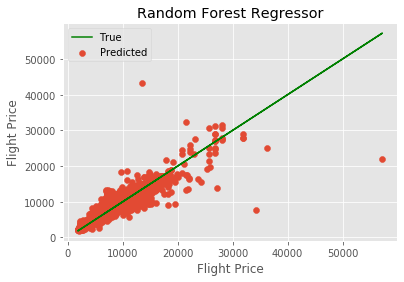

In [85]:
#plotting the true and predicted prices
plt.scatter(yts,ypr_rf,label='Predicted')
plt.plot(yts,yts,label='True',c='g')
plt.xlabel('Flight Price')
plt.ylabel('Flight Price')
plt.legend(loc='best')
plt.title('Random Forest Regressor')
plt.show()